<a href="https://colab.research.google.com/github/DmitryKostin/yandex-praktikum-data-analyst/blob/main/02_credit_research_project/credit_research_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надежности заемщиков

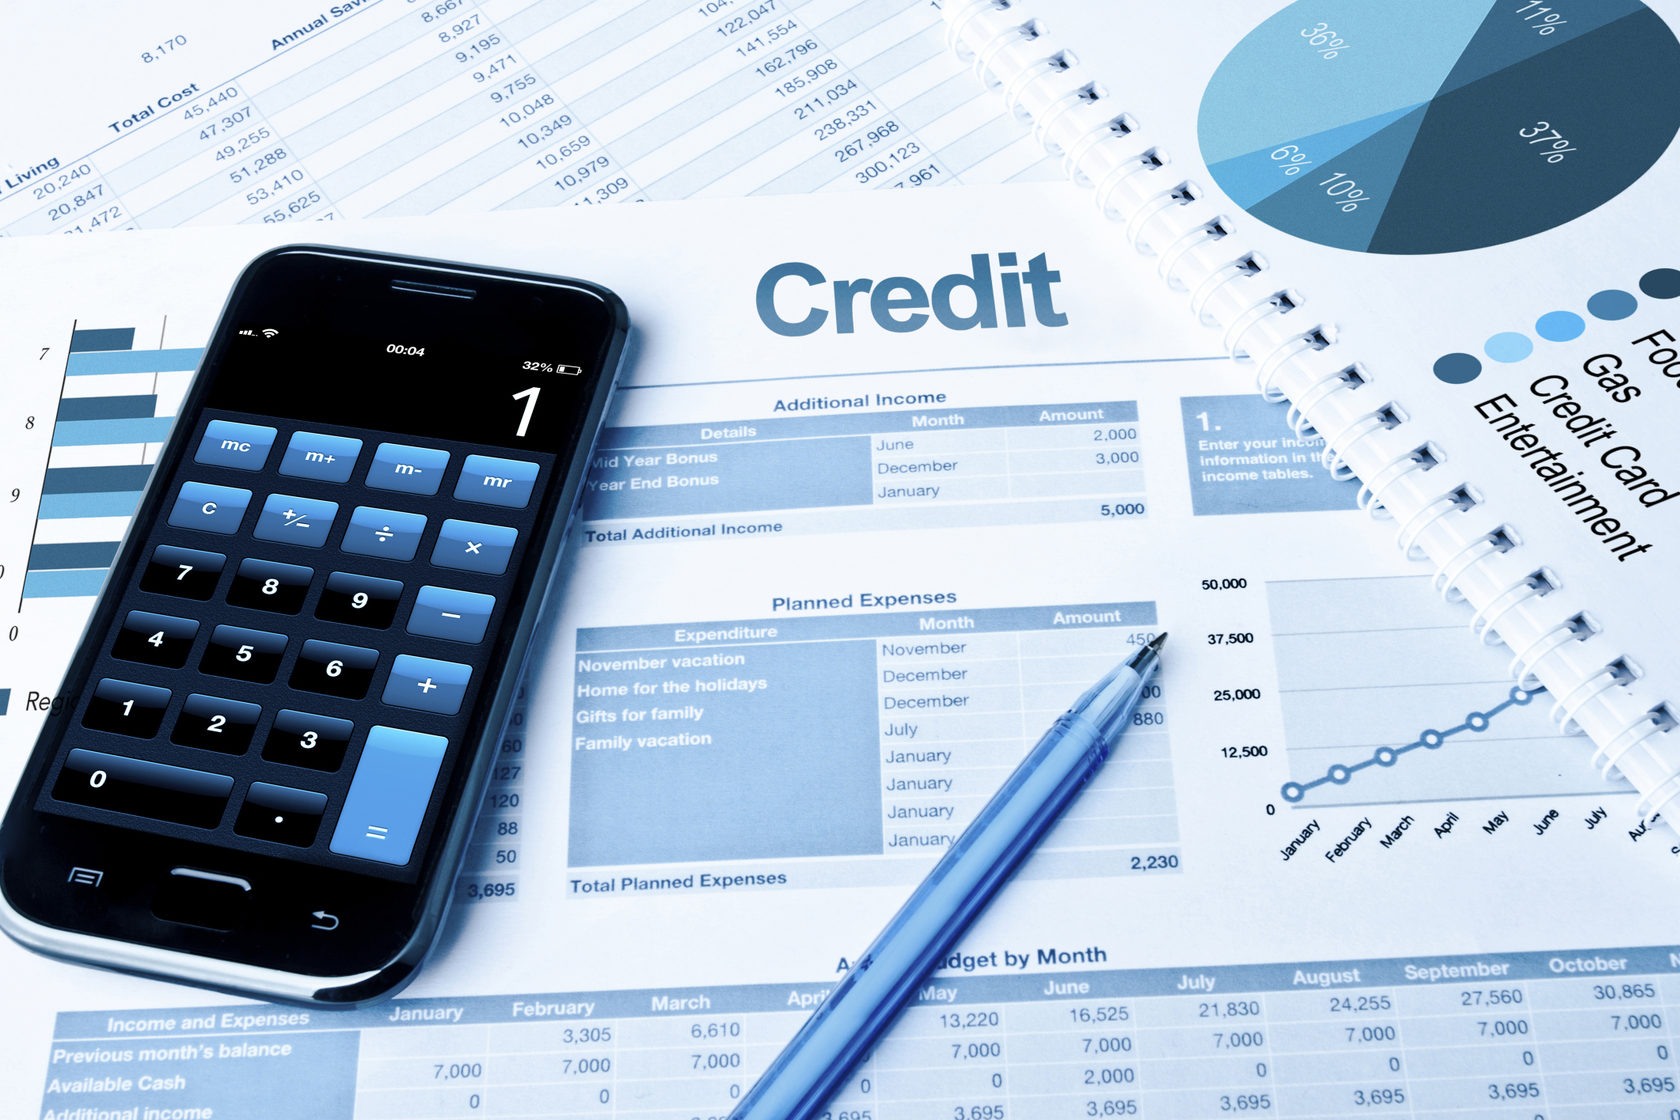

**Содержание** <a class='anchor' id='table_of_contents'></a>

* [Описание проекта](#description)
* [Описание данных](#data)
* [Шаг 1. Загрузка данных и изучение общей информации](#step_1)
* [Шаг 2. Предобработка данных](#step_2)
    * [Удаление пропусков](#step_2_1)
    * [Обработка аномальных значений](#step_2_2)
    * [Заполнение пропусков](#step_2_3)
    * [Изменение типов данных](#step_2_4)
    * [Обработка дубликатов](#step_2_5)
    * [Категоризация данных](#step_2_6)
* [Шаг 3. Исследовательский анализ данных](#step_3)
    * [Влияние количества детей на возврат кредита в срок](#step_3_1)
    * [Влияние семейного положения на возврат кредита в срок](#step_3_2)
    * [Влияние уровня дохода на возврат кредита в срок](#step_3_3)
    * [Влияние разных целей кредита на его возврат в срок](#step_3_4)
    * [Причины появления пропусков](#step_3_5)
    * [Выводы по шагу 3](#step_3_6)
* [Выводы и рекомендации](#final)

## Описание проекта <a class='anchor' id='description'></a>

**Цель проекта** — разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Заказчик — кредитный отдел банка.  Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Описание данных <a class='anchor' id='data'></a>

Датасет проекта содержит следующие столбцы:

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

[Назад к содержанию](#table_of_contents)

## Шаг 1. Загрузка данных и изучение общей информации <a class='anchor' id='step_1'></a>

Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

Выведем первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


[Назад к содержанию](#table_of_contents)

## Шаг 2. Предобработка данных <a class='anchor' id='step_2'></a>

### Удаление пропусков <a class='anchor' id='step_2_1'></a>

Выведем количество пропущенных значений для каждого столбца.

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

[Назад к содержанию](#table_of_contents)

### Обработка аномальных значений <a class='anchor' id='step_2_2'></a>

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Выведем перечень уникальных значений столбца `children`.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

[Назад к содержанию](#table_of_contents)

### Заполнение пропусков <a class='anchor' id='step_2_3'></a>

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

[Назад к содержанию](#table_of_contents)

### Изменение типов данных <a class='anchor' id='step_2_4'></a>

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [14]:
data['total_income'] = data['total_income'].astype(int)

[Назад к содержанию](#table_of_contents)

### Обработка дубликатов <a class='anchor' id='step_2_5'></a>

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [15]:
data.duplicated().sum()

54

In [16]:
data = data.drop_duplicates()

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы.

In [17]:
data['education'] = data['education'].str.lower()

[Назад к содержанию](#table_of_contents)

### Категоризация данных <a class='anchor' id='step_2_6'></a>

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


Например, кредитополучателю с доходом 25 000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Воспользуемся собственной функцией с именем `categorize_income()` и методом `apply()`.

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

Воспользуемся собственной функцией с именем `categorize_purpose()` и методом `apply()`. Изучим данные в столбце `purpose` и определим, какие подстроки помогут правильно определить категорию.

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

[Назад к содержанию](#table_of_contents)

## Шаг 3. Исследовательский анализ данных <a class='anchor' id='step_3'></a>

### Влияние количества детей на возврат кредита в срок <a class='anchor' id='step_3_1'></a>

Определим, есть ли зависимость между количеством детей и возвратом кредита в срок.

Сгруппируем обработанные данные по столбцу `children` и применим аггрегирующую функцию `agg`. 
Поскольку столбец `debt` представлен бинарными значениями (1 и 0), аргументы функции `['sum', 'count', 'mean']` дадут следующие результаты: 
- сумма всех значений ('sum') - вернет количество просроченных кредитов; 
- подсчет всех значений ('count') - вернет количество всех выданных кредитов в разрезе категории;
- среднее значение ('mean') - расчитает долю просроченных кредитов.

In [23]:
df = data.groupby('children').agg({'debt': ['sum', 'count', 'mean']}) \
    .reset_index() 
df.columns = ['Количество детей', 'Задолженности', 'Всего кредитов', 'Доля просроченных кредитов']
df

,Количество детей,Задолженности,Всего кредитов,Доля просроченных кредитов
0,0,1063,14107,0.075353
1,1,444,4809,0.092327
2,2,194,2052,0.094542
3,3,27,330,0.081818
4,4,4,41,0.097561
5,5,0,9,0.000000


Как видно из расчетов, с увеличением количества детей прослеживается тенденция на рост доли просроченных кредитов - с 7,5% у бездетных заёмщиком до 9,8% у заёмщиком с четырьмя детьми.
Наибольшее количество выданных кредитов приходится на бездетных заемщиков (66%) - данная категория имеет наименьшую доля просроченных кредитов (7,5%).
Отсутствие задолженности у семей с 5-ю детьми может быть связано с высокой ответственностью заемщиков, однако, чтобы делать выводы об этой категории данная выборка слишком мала (всего 9 выданных кредитов).

Чтобы визуально оценить зависимость величин, построим график. Шкалу с долей просроченых кредитов слева выразим в целочисленных процентах.

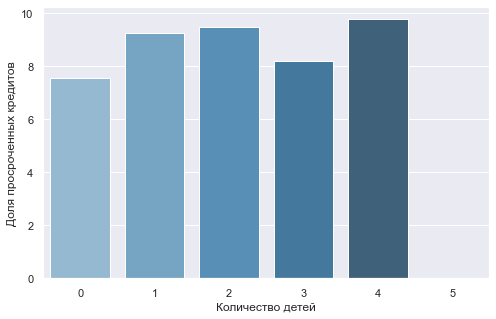

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(x=df['Количество детей'], y=df['Доля просроченных кредитов'] * 100, palette="Blues_d");

**Вывод:** между количеством детей и возвратом кредита в срок наблюдается зависимость. Большее количество детей способствует увеличению доли просроченных кредитов в соответствующей группе заемщиков. Однако, сказать, что данная тенденция распространяется и на семьи с пятью детьми нельзя по причине малого количества наблюдений в данных.

[Назад к содержанию](#table_of_contents)

### Влияние семейного положения на возврат кредита в срок <a class='anchor' id='step_3_2'></a>

Определим, есть ли зависимость между семейным положением и возвратом кредита в срок.

Для ответа на вопрос сгруппируем обработанные данные по семейному положению (столбец `family_status`) и применим аггрегирующую функцию `agg` с расчетами суммы, количества и среднего. Полученный датафрейм отсортируем по доле просроченных кредитов по убыванию.

In [25]:
df_2 = data.groupby('family_status').agg({'debt': ['sum', 'count', 'mean']}) \
    .reset_index()
df_2.columns = ['Семейное положение', 'Задолженности', 'Всего кредитов', 'Доля просроченных кредитов']
df_2.sort_values(by='Доля просроченных кредитов', ascending=False)

,Семейное положение,Задолженности,Всего кредитов,Доля просроченных кредитов
0,Не женат / не замужем,273,2796,0.097639
3,гражданский брак,385,4146,0.092861
4,женат / замужем,927,12266,0.075575
1,в разводе,84,1189,0.070648
2,вдовец / вдова,63,951,0.066246


Как видим из расчетов, наибольшая доля просроченных кредитов приходится на заемщиков несостоящих в браке официально: 
- не женат / не замужем - 9,8%;
- гражданский брак - 9,3%.

В остальных случаях невозврат кредитов ниже - остается в интервале 6,6-7,6%.

**Вывод:** семейное положение влияет на возврат кредита в срок - заемщики несостоящие в браке официально склонны чаще не возвращать кредит в срок.

[Назад к содержанию](#table_of_contents)

### Влияние уровня дохода на возврат кредита в срок <a class='anchor' id='step_3_3'></a>

Определим, есть ли зависимость между уровнем дохода и возвратом кредита в срок.

Для ответа на вопрос сгруппируем обработанные данные по уровню дохода (столбец `total_income_category`) и применим аггрегирующую функцию `agg` с расчетами суммы, количества и среднего. Полученный датафрейм отсортируем по доле просроченных кредитов по убыванию.

In [26]:
df_3 = data.groupby('total_income_category').agg({'debt': ['sum', 'count', 'mean']}) \
    .reset_index()
df_3.columns = ['Уровень дохода', 'Задолженности', 'Всего кредитов', 'Доля просроченных кредитов']
df_3.sort_values(by='Доля просроченных кредитов', ascending=False)

,Уровень дохода,Задолженности,Всего кредитов,Доля просроченных кредитов
4,E,2,22,0.090909
2,C,1353,15938,0.084891
0,A,2,25,0.080000
1,B,354,5014,0.070602
3,D,21,349,0.060172


Как видно из данных, меньше всего задолженностей по кредиту у заемщиков категории D (доход 30 тыс. - 50 тыс.) - 6,0%, больше всего у заемщиков категории Е (доход менее 30 тыс.) - 9,1%.

Примечательно, что заемщики категории A (доход более 1 млн) тоже могут не погашать кредит в срок - 8%.

Построим график, чтобы более отчетливо увидеть различия между категориями.

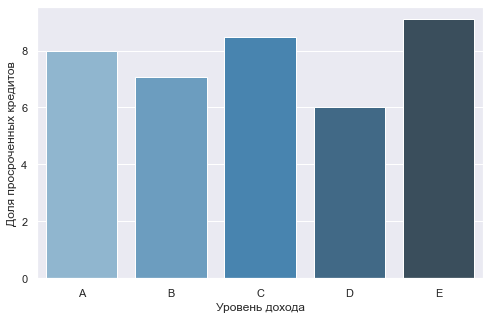

In [27]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(x=df_3['Уровень дохода'], y=df_3['Доля просроченных кредитов'] * 100, palette="Blues_d");

**Вывод:** между уровнем дохода и возвратом кредита в срок наблюдается зависимость. Заемщики с более низким уровнем дохода склонны допускать чаще невозврат кредита в срок, чем более состоятельные заемщики, однако, разница в долях не особо существенна. 

[Назад к содержанию](#table_of_contents)

### Влияние разных целей кредита на его возврат в срок <a class='anchor' id='step_3_4'></a>

Определим, как разные цели кредита влияют на его возврат в срок.

Сгруппируем обработанные данные по новому столбцу `purpose_category` и применим аггрегирующую функцию `agg`. Отсортируем полученный датафрейм по доле просроченных кредитов по убыванию.

In [28]:
df_4 = data.groupby('purpose_category').agg({'debt': ['sum', 'count', 'mean']}) \
    .reset_index()
df_4.columns = ['Цель кредита', 'Задолженности', 'Всего кредитов', 'Доля просроченных кредитов']
df_4.sort_values(by='Доля просроченных кредитов', ascending=False)

,Цель кредита,Задолженности,Всего кредитов,Доля просроченных кредитов
0,операции с автомобилем,400,4281,0.093436
2,получение образования,369,3989,0.092504
3,проведение свадьбы,183,2324,0.078744
1,операции с недвижимостью,780,10754,0.072531


Как мы видим, наибольшие доли просроченных кредитов имеются у кредитов, полученные для целей:
- операции с автомобилем - 9,34%;
- получение образования	- 9,25%.

**Вывод:** наибольшие доли невозвращенных в срок кредитов наблюдаются у заемщиков, взявших их для операций с автомобилем или для получения образования. В остальных случаях невозврат кредита в срок случается реже - в 7,3-7,9% случаев.

[Назад к содержанию](#table_of_contents)

### Причины появления пропусков <a class='anchor' id='step_3_5'></a>

Определим возможные причины появления пропусков в исходных данных.

Обратимся к исходным необработанным данным и рассчитаем еще раз количество пропусков.

In [29]:
data_raw = pd.read_csv('data.csv')

In [30]:
data_raw.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски в исходных данных имелись только в двух столбцах - `days_employed` и `total_income`. 
Каждый из этих столбцов имел равное количество пропусков - 2174.
Посмотрим, присутствуют ли эти пропуски в одних и тех же строках датафрейма.

Отберем строки с пропусками с столбце `days_employed`.

In [31]:
data_raw[data_raw['days_employed'].isna()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Как видно из таблицы, пропуски имеются в одних и тех строках датафрейма. Но нужно убедиться, что это характерно для всего датафрейма.
Для этого сравним индексы строк с пропусками в двух столбцах соответственно.

In [32]:
days_employed_na = list(data_raw[data_raw['days_employed'].isna()]['days_employed'].index)
total_income_na = list(data_raw[data_raw['total_income'].isna()]['total_income'].index)

days_employed_na == total_income_na

True

Как мы видим, сравнение возвращает `True` - массивы с индексами идентичны, а значит во всем датафрейме пропуски находятся в одних и тех же строках. Посмотрим в каких группах заемщиков пропуски встречаются чаще.

In [33]:
data_raw[data_raw['days_employed'].isna()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

**Вывод:** появление пропусков вероятно связано с отсутствием информации о стаже и доходе заемщиков - сведения не были предоставлены, либо самим заемщиком, либо работодателем.
Наиболее распространенные пропуски среди категории 'сотрудник' (1105 пропуск из 2174).
В случае если заемщик является безработным и относится к категории пенсионеров, то данных о текущей занятости не должно быть в принципе.

Объясним ниже, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Медианные значения помогают избежать смешения данных, сохраняя однородность признака внутри той или иной группы. С точки зрения статистики, в этом случае выборка по группе будет сохранять репрезентативность, что поможет избежать увеличения дисперсии значений, выбросов и нежелательных максимумов, минимумов. 

[Назад к содержанию](#table_of_contents)

### Выводы по шагу 3 <a class='anchor' id='step_3_6'></a>

В процессе анализа имеющихся данных были обнаружены следующие взаимосвязи:
1. На возврат кредита в срок влияет количество детей заемщика. Большее количество детей способствует увеличению доли просроченных кредитов в соответствующей группе заемщиков. Однако, сказать, что данная тенденция распространяется и на семьи с пятью детьми нельзя по причине малого количества наблюдений в данных.
2. Семейное положение влияет на возврат кредита в срок - заемщики не состоящие в браке официально (в том числе гражданские браки) склонны чаще не возвращать кредит в срок.
3. Уровень дохода оказывает влияение на возврат кредита в срок. Заемщики с более низким уровнем дохода склонны допускать чаще невозврат кредита в срок, чем более состоятельные заемщики, однако, разница в долях не особо существенна.
4. Цель кредита влияет на его возврат в срок. Наибольшие доли невозвращенных в срок кредитов наблюдаются у заемщиков, взявших их для операций с автомобилем или для получения образования. В остальных случаях невозврат кредита в срок случается реже.
5. Появление пропусков связано с отсутствием информации о стаже и доходе заемщиков - сведения не были предоставлены, либо самим заемщиком, либо работодателем.
6. Заполнение пропусков среди количественных переменных медианными значениями помогает избежать смешения данных, сохраняет однородность признака внутри той или иной группы.

[Назад к содержанию](#table_of_contents)

## Выводы и рекомендации <a class='anchor' id='final'></a>

Было проведено исследование, целью которого было выявить факторы влияния на возврат кредита в срок заемщиком. 

Исходные данные - данные о заемщиках банка и сведения об их платежеспособности.

В процессе исследования были выдвинуты следующие гипотезы:

- гипотеза 1: на возврат кредита в срок влияет количество детей заемщика;
- гипотеза 2: на возврат кредита в срок влияет семейное положение заемщика;
- гипотеза 3: на возврат кредита в срок влияет уровень дохода заемщика;
- гипотеза 4: на возврат кредита в срок влияют различные цели кредита.

__Гипотеза 1 - подтверждена.__

_На возврат кредита в срок влияет количество детей заемщика._

Установлены следующие доли должников среди групп заемщиков:
- без детей - 7,5%;
- с одним ребенков - 9,2%;
- с двумя детьми - 9,5%;
- с тремя детьми - 8,2%;
- имеющие четверо детей - 9,7%.

С увеличением количества детей прослеживается тенденция на рост доли просроченных кредитов - с 7,5% у бездетных заёмщиком до 9,8% у заёмщиком с четырьмя детьми.

Наибольшее количество выданных кредитов приходится на бездетных заемщиков (66%) - данная категория имеет наименьшую доля просроченных кредитов (7,5%).

Отсутствие задолженности у семей с 5-ю детьми может быть связано с высокой ответственностью заемщиков, однако, чтобы делать выводы об этой категории данная выборка слишком мала (всего 9 выданных кредитов) - требуется провести дополнительное исследование с большей выборкой.

_Рекомендации: провести исследование с большей выборкой данных в категории заемщиков с пятью детьми._

__Гипотеза 2 - подтверждена.__

_На возврат кредита в срок влияет семейное положение заемщика._

Было установлено, что наибольшая доля просроченных кредитов приходится на заемщиков, не состоящих в браке официально:

- не женат / не замужем - 9,8%;
- гражданский брак - 9,3%.

В остальных случаях невозврат кредитов ниже - остается в интервале 6,6-7,6%:

- женат / замужем - 7,6%;
- в разводе - 7,1%;
- вдова / вдовец - 6,6%.

Опираясь на данные расчеты, есть основание полагать, что заемщики, имеющие официально узаконенные отношения, ведут себя финансово более ответственно в отличие от заемщиков, не имеющих официальных отношений.

__Гипотеза 3 - частично подтверждена.__

_На возврат кредита в срок влияет уровень дохода заемщика._

В разрезе категорий заемщиков по уровню дохода были получены данные о долях просроченных кредитов:

- категория A (доход более 1 млн) - 8,0%;
- категория B (доход 200 тыс. - 1 млн) - 7,1%;
- категория C (доход 50-200 тыс.) - 8,5%;
- категория D (доход 30-50 тыс.) - 6,0%;
- категория E (доход менее 30 тыс.) - 9,1%.

Меньше всего задолженностей по кредиту у заемщиков категории D - 6,0%, больше всего у заемщиков категории Е - 9,1%.

Заемщики категории A тоже могут не погашать кредит в срок (8,0%), но данных об этой группе недостаточно для более объективных выводов.

_Рекомендации: для объективных выводов и полного подтверждения гипотезы необходимо больше данных о заемщиках категорий A, D, E._

__Гипотеза 4 - подтверждена.__

_На возврат кредита в срок влияют различные цели кредита._

Наибольшие доли просроченных кредитов имеются у кредитов, полученные для целей:

- операции с автомобилем - 9,34%;
- получение образования - 9,25%.

Более низкие показатели (различие около 1-2%) у кредитов, полученных для целей:
- проведение свадьбы - 7,9%;
- операции с недвижимостью - 7,3%.

Наибольшие доли невозвращенных в срок кредитов наблюдаются у заемщиков, взявших их для операций с автомобилем или для получения образования. В остальных случаях невозврат кредита в срок случается реже - в 7,3-7,9% случаев.

__Рекомендации__
1. Провести исследование с большей выборкой данных в категории заемщиков с пятью детьми.
2. Для объективных выводов и полного подтверждения гипотезы необходимо больше данных о заемщиках категорий A, D, E.

__Причины пропусков в исходных данных__

Пропуски в исходных данных имелись только в двух столбцах - `days_employed` и `total_income`. Каждый из этих столбцов имел равное количество пропусков - 2174.

Появление пропусков, вероятно, связано с отсутствием информации о стаже и доходе заемщиков - сведения не были предоставлены, либо самим заемщиком, либо работодателем. Наиболее распространенные пропуски среди категории 'сотрудник' (1105 пропуск из 2174). В случае если заемщик является безработным и относится к категории пенсионеров, то данных о текущей занятости не должно быть в принципе.

В разрезе типа занятости заемщиков пропуски были распределены следующим образом:

- сотрудник      -    1105;
- компаньон      -     508;
- пенсионер       -    413;
- госслужащий      -   147;
- предприниматель   -    1.

__Причины заполнения пропусков медианными значениями__

Медианные значения помогают избежать смешения данных, сохраняя однородность признака внутри той или иной группы. С точки зрения статистики, в этом случае выборка по группе будет сохранять репрезентативность, что поможет избежать увеличения дисперсии значений, выбросов и нежелательных максимумов, минимумов.


[Назад к содержанию](#table_of_contents)